# Class 13 – Understanding ML Workflow
**Objective**: Understand the key steps of a machine learning workflow, including:
- Data collection
- Preprocessing
- Model selection
- Training
- Evaluation

Also, learn essential ML terms and build an end-to-end ML pipeline using the Titanic dataset.

## 1. Introduction to the ML Workflow

### Key Steps:
1. **Data Collection**: Gathering relevant data (e.g., Titanic passenger info).
2. **Preprocessing**: Cleaning and preparing data (handle missing values, encode categories, etc.).
3. **Model Selection**: Choose algorithm (Random Forest, Logistic Regression, etc.).
4. **Training**: Let the model learn from the training data.
5. **Evaluation**: Check how well the model performs.

### Key ML Terminologies:
- **Features**: Input variables (e.g., Age, Fare).
- **Labels**: Output/target variable (e.g., Survived).
- **Training Set**: Used to train the model.
- **Test Set**: Used to evaluate the model.
- **Overfitting**: Model is too good on training but poor on test data.
- **Cross-validation**: Repeatedly split and test data to improve reliability.

## 2. Build an End-to-End ML Pipeline

### Step 1: Import Libraries
We'll use pandas, sklearn, and matplotlib.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

### Step 2: Load the Titanic Dataset
Make sure the `titanic.csv` file is in your working directory.

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
data.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
data.sample(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
713,714,0,3,"Larsson, Mr. August Viktor",male,29.0,0,0,7545,9.4833,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
781,782,1,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17.0,1,0,17474,57.0000,B20,S
79,80,1,3,"Dowdell, Miss. Elizabeth",female,30.0,0,0,364516,12.4750,NaN,S


### Step 3: Preprocess the Data
We'll:
- Remove rows with missing values in important columns
- Convert 'Sex' to numbers (male: 0, female: 1)


In [18]:
data.shape

(891, 12)

In [19]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:
data.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [21]:
data.sample(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
573,574,1,3,"Kelly, Miss. Mary",female,NaN,0,0,14312,7.75,NaN,Q
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.00,NaN,S


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
# Null Values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
# Drop only irrelevant and highly missing columns
data = data.drop(columns=['Name', 'Ticket', 'Cabin'])
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [15]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [26]:
# Fill missing 'Fare' values with the most common one
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [27]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,0


In [16]:
# Filling "Age" column with median value
data['Age'] = data['Age'].fillna(data['Age'].median())


In [29]:
data.shape

(891, 9)

In [ ]:
# Filling with Median Age by Pclass & Sex
data['Age'] = data.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))


In [30]:
# Encode 'Sex': male = 0, female = 1
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


### Step 4: Select Features and Labels
We will use `Pclass`, `Age`, `Fare`, and `Sex` to predict `Survived`.

In [31]:
X = data[['Pclass', 'Age', 'Fare', 'Sex']]
y = data['Survived']

### Step 5: Split Data into Training and Test Sets

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 6: Model Selection and Training

In [33]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

### Step 7: Model Evaluation
Let's test the model on test data.

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%") 

Accuracy: 79.33%


## 3. Model Evaluation through Cross Validation

### Cross-Validation
Cross-validation helps us better understand our model performance on different subsets of data.

In [35]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-Validation Scores: {scores}")
print(f"Mean Accuracy: {scores.mean() * 100:.2f}%")

Cross-Validation Scores: [0.76536313 0.80337079 0.84269663 0.80337079 0.83146067]
Mean Accuracy: 80.93%


## 4. Making Predictions with New Data

In [ ]:
# Predict for a female passenger, age 25, Pclass 2, Fare 20
new_passenger = pd.DataFrame({
    'Pclass': [2],
    'Age': [25],
    'Fare': [20],
    'Sex': [1]  # female
})
prediction = model.predict(new_passenger)
print('Prediction:', 'Survived' if prediction[0] == 1 else 'Did Not Survive')

Prediction: Survived


In [ ]:
# Ask user for input values
pclass = int(input("Enter Pclass (1, 2, or 3): "))
age = float(input("Enter Age (e.g., 29): "))
fare = float(input("Enter Fare (e.g., 30.5): "))
sex_input = input("Enter Sex (male/female): ")

# Convert sex to numeric
sex = 1 if sex_input.lower() == 'female' else 0

# Create DataFrame for prediction
user_data = pd.DataFrame({
    'Pclass': [pclass],
    'Age': [age],
    'Fare': [fare],
    'Sex': [sex]
})

# Predict and display result
prediction = model.predict(user_data)
print("\nPrediction:", "Survived " if prediction[0] == 1 else "Did Not Survive ")


## 5. Data Visualization

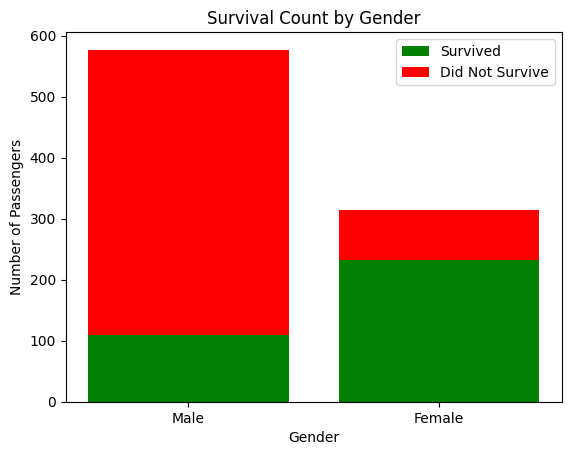

In [37]:
import matplotlib.pyplot as plt

# Count survivors by gender
male_survived = data[(data['Sex'] == 0) & (data['Survived'] == 1)].shape[0]
male_not_survived = data[(data['Sex'] == 0) & (data['Survived'] == 0)].shape[0]
female_survived = data[(data['Sex'] == 1) & (data['Survived'] == 1)].shape[0]
female_not_survived = data[(data['Sex'] == 1) & (data['Survived'] == 0)].shape[0]

# Set up data
labels = ['Male', 'Female']
survived = [male_survived, female_survived]
not_survived = [male_not_survived, female_not_survived]

# Plotting
x = [0, 1]
plt.bar(x, survived, color='green', label='Survived')
plt.bar(x, not_survived, bottom=survived, color='red', label='Did Not Survive')

# Labels and legend
plt.xticks(x, labels)
plt.xlabel("Gender")
plt.ylabel("Number of Passengers")
plt.title("Survival Count by Gender")
plt.legend()
plt.show()

### Overfitting vs Underfitting
- **Overfitting**: Model memorizes the training data. Poor generalization.
- **Underfitting**: Model is too simple. Can't capture patterns.

Use **cross-validation** and **simpler or regularized models** to fix.

## 4. Wrap-Up and Homework

### Recap:
- Understood ML workflow: collection → preprocessing → training → evaluation
- Built full pipeline on Titanic dataset
- Learned about overfitting, cross-validation, hyperparameter tuning

### Homework:
- Use another dataset like Iris or Breast Cancer from sklearn
- Build a similar pipeline
- Try different models: LogisticRegression, KNeighborsClassifier
- Use cross-validation to compare models
